## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [3]:
df = pd.read_csv("/content/CC GENERAL.csv")

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df = df.fillna(0)

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df = pd.get_dummies(df)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

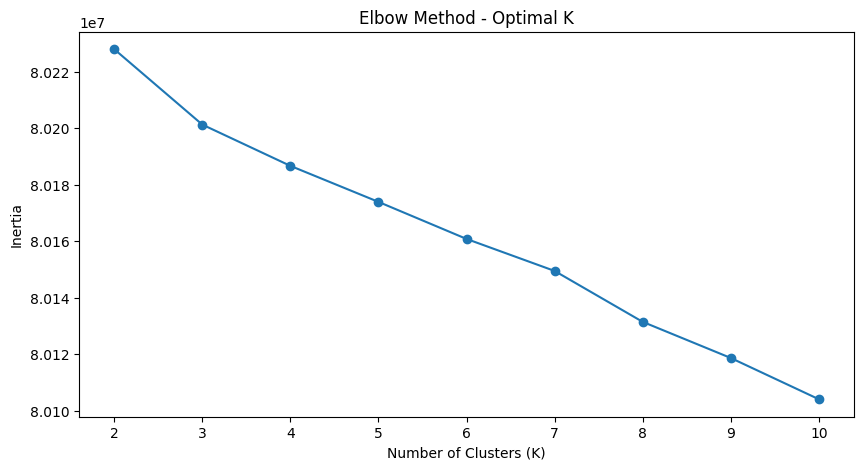

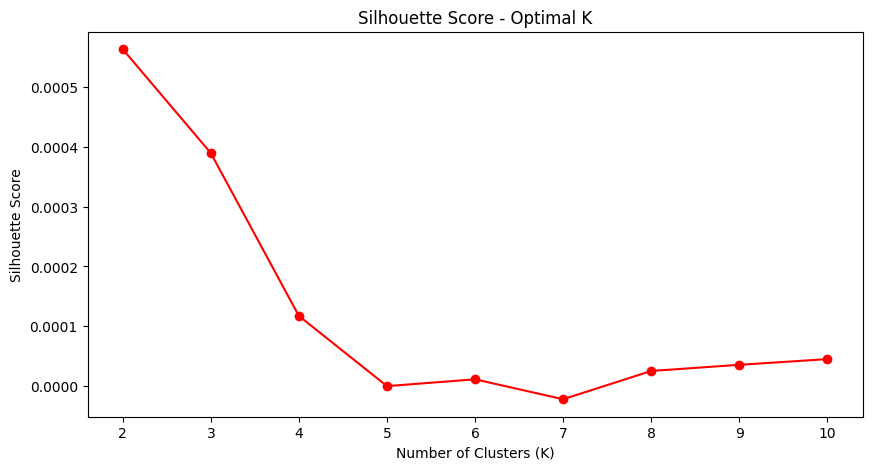

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range of K values to test
K_range = range(2, 11)

# Store inertia (Elbow Method) and silhouette scores
inertia = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)

    inertia.append(kmeans.inertia_)  # Elbow Method
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))  # Silhouette Score

# Plot Elbow Method
plt.figure(figsize=(10,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Optimal K')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10,5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score - Optimal K')
plt.show()


Choose the optimal K and calculate the silhouette score for the best model.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set your chosen optimal K
optimal_k = 4  # Update this based on your analysis

# Train the K-Means model with the optimal K
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(scaled_df)

# Add cluster labels to the dataset
df['KMeans_Cluster'] = cluster_labels

# Compute Silhouette Score for the final model
best_silhouette_score = silhouette_score(scaled_df, cluster_labels)

print(f"Optimal K: {optimal_k}")
print(f"Silhouette Score for Best K-Means Model: {best_silhouette_score:.4f}")


Optimal K: 4
Silhouette Score for Best K-Means Model: 0.0001


## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np


In [12]:
linkages = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan', 'cosine']


Choose the optimal K and calculate the silhouette score for the best model.

In [2]:
import pandas as pd

df = pd.read_csv("CC GENERAL.csv")  # Load your dataset
df = df.fillna(0)  # Fill missing values


In [3]:
df_sampled = df.sample(n=500, random_state=42)  # Take 500 random rows


In [5]:
# Drop ID column if it exists
df_sampled = df.sample(n=500, random_state=42).drop(columns=["CUST_ID"], errors="ignore")

# Scale the numeric data
scaler = StandardScaler()
scaled_sampled_df = scaler.fit_transform(df_sampled)


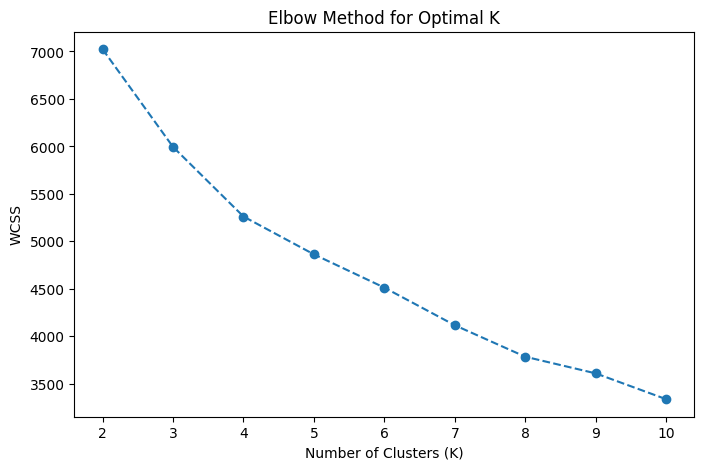

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different values of K
wcss = []  # Within-Cluster Sum of Squares
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_sampled_df)
    wcss.append(kmeans.inertia_)  # Store WCSS

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [7]:
from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_sampled_df)
    score = silhouette_score(scaled_sampled_df, labels)
    silhouette_scores[k] = score
    print(f"K={k}, Silhouette Score={score:.4f}")

# Find the best K
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Best K based on Silhouette Score: {best_k}")


K=2, Silhouette Score=0.2098
K=3, Silhouette Score=0.2724
K=4, Silhouette Score=0.1879
K=5, Silhouette Score=0.1938
K=6, Silhouette Score=0.1945
K=7, Silhouette Score=0.2065
K=8, Silhouette Score=0.2191
K=9, Silhouette Score=0.2158
K=10, Silhouette Score=0.2203
Best K based on Silhouette Score: 3


In [8]:
# Apply K-Means with the best K
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels_kmeans = kmeans_best.fit_predict(scaled_sampled_df)

# Add cluster labels to the sampled dataset
df_sampled["Cluster_KMeans"] = cluster_labels_kmeans

# Show first 5 rows
df_sampled.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_KMeans
7669,16.834929,0.454545,15.00,15.00,0.00,209.025389,0.090909,0.090909,0.000000,0.090909,1,1,7500.0,430.213001,86.959785,0.000000,11,2
6125,540.020858,1.000000,612.23,495.61,116.62,1708.923217,0.666667,0.166667,0.500000,0.333333,10,10,2000.0,1642.068707,419.956251,0.000000,12,2
7028,119.237712,1.000000,342.74,0.00,342.74,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,2000.0,327.166041,165.207233,0.000000,12,2
3019,894.081947,1.000000,1901.71,1853.11,48.60,206.618780,0.666667,0.666667,0.416667,0.083333,1,33,1500.0,947.130141,220.745296,0.000000,12,2
3479,1294.145453,1.000000,3059.10,1836.98,1222.12,0.000000,1.000000,0.416667,1.000000,0.000000,0,42,7000.0,5560.033502,497.637767,0.083333,12,1


In [9]:
from sklearn.cluster import AgglomerativeClustering

linkages = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan', 'cosine']

best_score = -1
best_params = None

for linkage in linkages:
    for metric in metrics:
        if linkage == 'ward' and metric != 'euclidean':  # Ward only works with Euclidean
            continue

        # Apply Agglomerative Clustering
        agg_clustering = AgglomerativeClustering(n_clusters=best_k, linkage=linkage, metric=metric)
        labels_agg = agg_clustering.fit_predict(scaled_sampled_df)

        # Compute silhouette score
        score = silhouette_score(scaled_sampled_df, labels_agg)
        print(f"Metric: {metric}, Linkage: {linkage}, Silhouette Score: {score:.4f}")

        # Store best model
        if score > best_score:
            best_score = score
            best_params = (metric, linkage)

print(f"\nBest Agglomerative Clustering Model: Metric={best_params[0]}, Linkage={best_params[1]}, Silhouette Score={best_score:.4f}")


Metric: euclidean, Linkage: ward, Silhouette Score: 0.3004
Metric: euclidean, Linkage: complete, Silhouette Score: 0.5394
Metric: manhattan, Linkage: complete, Silhouette Score: 0.2138
Metric: cosine, Linkage: complete, Silhouette Score: 0.1411
Metric: euclidean, Linkage: average, Silhouette Score: 0.5898
Metric: manhattan, Linkage: average, Silhouette Score: 0.5494
Metric: cosine, Linkage: average, Silhouette Score: 0.1655
Metric: euclidean, Linkage: single, Silhouette Score: 0.6502
Metric: manhattan, Linkage: single, Silhouette Score: 0.6502
Metric: cosine, Linkage: single, Silhouette Score: -0.0609

Best Agglomerative Clustering Model: Metric=euclidean, Linkage=single, Silhouette Score=0.6502


## DBSCAN

Find the optimal DBSCAN model.

In [10]:
from sklearn.cluster import DBSCAN
import numpy as np

eps_values = np.arange(0.1, 2, 0.2)
min_samples_values = range(5, 21)
best_dbscan_score = -1
best_dbscan_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbscan = dbscan.fit_predict(scaled_sampled_df)

        # Check if clustering found meaningful clusters
        if len(set(labels_dbscan)) > 1:
            score = silhouette_score(scaled_sampled_df, labels_dbscan)
            print(f"EPS={eps}, Min Samples={min_samples}, Silhouette Score={score:.4f}")

            # Store the best DBSCAN model
            if score > best_dbscan_score:
                best_dbscan_score = score
                best_dbscan_params = (eps, min_samples)

print(f"\nBest DBSCAN Model: EPS={best_dbscan_params[0]}, Min Samples={best_dbscan_params[1]}, Silhouette Score={best_dbscan_score:.4f}")


EPS=0.30000000000000004, Min Samples=5, Silhouette Score=-0.2436
EPS=0.30000000000000004, Min Samples=6, Silhouette Score=-0.2289
EPS=0.5000000000000001, Min Samples=5, Silhouette Score=-0.1940
EPS=0.5000000000000001, Min Samples=6, Silhouette Score=-0.1940
EPS=0.5000000000000001, Min Samples=7, Silhouette Score=-0.1987
EPS=0.5000000000000001, Min Samples=8, Silhouette Score=-0.2079
EPS=0.5000000000000001, Min Samples=9, Silhouette Score=-0.2079
EPS=0.5000000000000001, Min Samples=10, Silhouette Score=-0.2079
EPS=0.5000000000000001, Min Samples=11, Silhouette Score=-0.2196
EPS=0.7000000000000001, Min Samples=5, Silhouette Score=-0.2269
EPS=0.7000000000000001, Min Samples=6, Silhouette Score=-0.1458
EPS=0.7000000000000001, Min Samples=7, Silhouette Score=-0.1487
EPS=0.7000000000000001, Min Samples=8, Silhouette Score=-0.1550
EPS=0.7000000000000001, Min Samples=9, Silhouette Score=-0.1577
EPS=0.7000000000000001, Min Samples=10, Silhouette Score=-0.1577
EPS=0.7000000000000001, Min Samples

Find the parameters that optimize the performance of your model and calculate the silhouette score.

K=2, Silhouette Score=0.2098
K=3, Silhouette Score=0.2724
K=4, Silhouette Score=0.1879
K=5, Silhouette Score=0.1938
K=6, Silhouette Score=0.1945
K=7, Silhouette Score=0.2065
K=8, Silhouette Score=0.2191
K=9, Silhouette Score=0.2158
K=10, Silhouette Score=0.2203

Best K for K-Means: 3


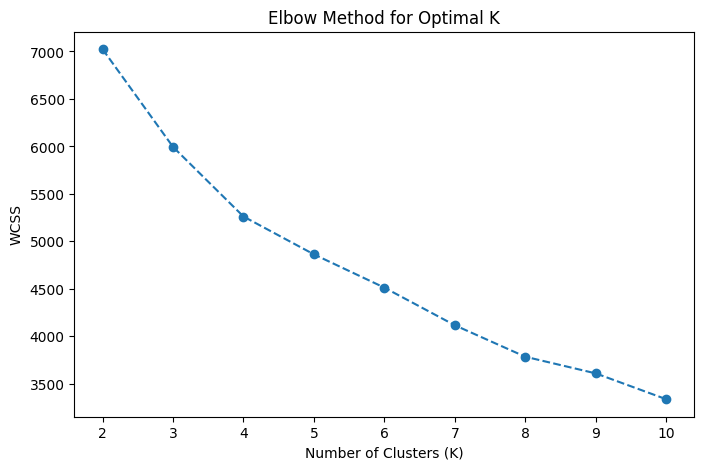

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Try different values of K
wcss = []
silhouette_scores = {}
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_sampled_df)

    wcss.append(kmeans.inertia_)  # Store WCSS
    score = silhouette_score(scaled_sampled_df, labels)  # Compute Silhouette Score
    silhouette_scores[k] = score

    print(f"K={k}, Silhouette Score={score:.4f}")

# Find the best K (highest silhouette score)
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest K for K-Means: {best_k}")

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [12]:
from sklearn.cluster import DBSCAN
import numpy as np

eps_values = np.arange(0.1, 2, 0.2)
min_samples_values = range(5, 21)
best_dbscan_score = -1
best_dbscan_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbscan = dbscan.fit_predict(scaled_sampled_df)

        # Check if clustering found meaningful clusters
        if len(set(labels_dbscan)) > 1:
            score = silhouette_score(scaled_sampled_df, labels_dbscan)
            print(f"EPS={eps}, Min Samples={min_samples}, Silhouette Score={score:.4f}")

            # Store the best DBSCAN model
            if score > best_dbscan_score:
                best_dbscan_score = score
                best_dbscan_params = (eps, min_samples)

print(f"\nBest DBSCAN Model: EPS={best_dbscan_params[0]}, Min Samples={best_dbscan_params[1]}, Silhouette Score={best_dbscan_score:.4f}")


EPS=0.30000000000000004, Min Samples=5, Silhouette Score=-0.2436
EPS=0.30000000000000004, Min Samples=6, Silhouette Score=-0.2289
EPS=0.5000000000000001, Min Samples=5, Silhouette Score=-0.1940
EPS=0.5000000000000001, Min Samples=6, Silhouette Score=-0.1940
EPS=0.5000000000000001, Min Samples=7, Silhouette Score=-0.1987
EPS=0.5000000000000001, Min Samples=8, Silhouette Score=-0.2079
EPS=0.5000000000000001, Min Samples=9, Silhouette Score=-0.2079
EPS=0.5000000000000001, Min Samples=10, Silhouette Score=-0.2079
EPS=0.5000000000000001, Min Samples=11, Silhouette Score=-0.2196
EPS=0.7000000000000001, Min Samples=5, Silhouette Score=-0.2269
EPS=0.7000000000000001, Min Samples=6, Silhouette Score=-0.1458
EPS=0.7000000000000001, Min Samples=7, Silhouette Score=-0.1487
EPS=0.7000000000000001, Min Samples=8, Silhouette Score=-0.1550
EPS=0.7000000000000001, Min Samples=9, Silhouette Score=-0.1577
EPS=0.7000000000000001, Min Samples=10, Silhouette Score=-0.1577
EPS=0.7000000000000001, Min Samples

## Result Interpretation and Discussion

[link text](https://)Which model was chosen? Why was it chosen and based on what?

In [14]:
print(f"\nK-Means Best Silhouette Score: {max(silhouette_scores.values()):.4f}")
print(f"Agglomerative Best Silhouette Score: {best_score:.4f}")
print(f"DBSCAN Best Silhouette Score: {best_dbscan_score:.4f}")



K-Means Best Silhouette Score: 0.2724
Agglomerative Best Silhouette Score: 0.6502
DBSCAN Best Silhouette Score: 0.2549
